In [1]:
# ライブラリを読み込む
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [2]:
#前処理を施したデータを読み込む
data=pd.read_csv('train_data.csv')
X=data[['client', 'close', 'price_am', 'price_pm', 'Friday',
        'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']]
y=data['y']

In [3]:
#学習データと、テストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=123)

In [4]:
#線形カーネルを利用したSVR
reg_linear = SVR(kernel='linear', C=1, epsilon=0.1, gamma='auto')

#多項式カーネルを利用した
reg_poly = SVR(kernel='poly', C=1, epsilon=0.1, gamma='auto')

#ガウス関数を利用した
reg_rbf = SVR(kernel='rbf', C=1, epsilon=0.1, gamma='auto')

#それぞれのモデルを学習させる
reg_linear.fit(X_train, np.ravel(y_train))
reg_poly.fit(X_train, np.ravel(y_train))
reg_rbf.fit(X_train, np.ravel(y_train))


SVR(C=1, gamma='auto')

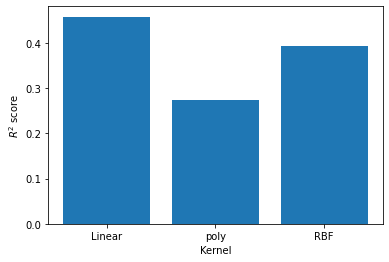

In [5]:
#それぞれのモデルのR^2スコアを計算
scores = (reg_linear.score(X_test, y_test),
reg_poly.score(X_test, y_test),
reg_rbf.score(X_test, y_test))

plt.bar(("Linear", "poly", "RBF"), scores)
plt.xlabel("Kernel")
plt.ylabel("$R^2$ score")
plt.show()

In [7]:
def MAE(model):
    y_pred=model.predict(X_test)
    print(mean_absolute_error(y_test, y_pred))

In [8]:
#各モデルに対して、コンペの評価であるMAEを計算させる
print(MAE(reg_linear),
MAE(reg_poly),
MAE(reg_rbf))

10.978505651783303
12.74157460063716
11.545193227606276
None None None


## グリッドサーチを使ってSVRのパラメータチューニング

In [9]:
tuned_parameters = [
    {'C': [1,5, 10,50, 100,500, 1000], 'kernel': ['linear']},
    {'C': [1,5, 10,50, 100,500, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.0001]},
    {'C': [1,5, 10,50, 100,500, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': [0.001, 0.0001]},
    {'C': [1,5, 10,50, 100,500, 1000], 'kernel': ['sigmoid'], 'gamma': [0.001, 0.0001]}
    ]
#score = mean_absolute_error(y_pred, y_train)
clf = GridSearchCV(
    SVR(), # 識別器
    tuned_parameters, # 最適化したいパラメータセット 
    cv=10, # 交差検定の回数
    n_jobs=-1,
   scoring='neg_mean_absolute_error'
) # モデルの評価関数の指定
clf.fit(X_train, y_train) 

GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid=[{'C': [1, 5, 10, 50, 100, 500, 1000],
                          'kernel': ['linear']},
                         {'C': [1, 5, 10, 50, 100, 500, 1000],
                          'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
                         {'C': [1, 5, 10, 50, 100, 500, 1000],
                          'degree': [2, 3, 4], 'gamma': [0.001, 0.0001],
                          'kernel': ['poly']},
                         {'C': [1, 5, 10, 50, 100, 500, 1000],
                          'gamma': [0.001, 0.0001], 'kernel': ['sigmoid']}],
             scoring='neg_mean_absolute_error')

In [10]:
def best_model(best_params):
    if best_params['kernel']=='rbf':
        model = SVR(kernel=best_params['kernel'], C=best_params['C'], epsilon=0.1, gamma=best_params['gamma'])
    elif best_params['kernel']=='poly':
        model=SVR(kernel=best_params['kernel'], C=best_params['C'], degree=best_param['degree'],
                  epsilon=0.1, gamma=best_params['gamma'])
    elif best_params['kernel']=='linear':
        model=SVR(kernel=best_model['kernel'],C=best_params['C'],epsilon=0.1)
    elif best_params['kernel']=='sigmoid':
        model=SVR(kernel=best_params['kernel'],C=betst_params['C'],gamma=best_params['gammma'],epsilon=0.1)
    return model

In [13]:
# 最適パラメータで学習させてモデルの保存
fit_model=best_model(clf.best_params_).fit(X_train,y_train)
#　上で学習させたモデルの評価
print(best_model(clf.best_params_))
print(MAE(fit_model))


SVR(C=1000, gamma=0.001)
10.922771453707899
None


## 提出用のcsvを作成する

In [ ]:
#提出用のデータを読み込み
test_data=pd.read_csv('test_data.csv')

In [ ]:
test_data

In [ ]:
def make_csv(model,out_csv_path):
    pred=model.predict(test_data.drop('datetime',axis=1))
    date=test_data['datetime']
    data_list=[]
    for i in range(len(date)):
        data_list.append([date[i],pred[i]])
    a=pd.DataFrame(data_list)
    print(a)
    a.to_csv('提出csv/'+out_csv_path,index=False)

In [ ]:
make_csv(reg_linear,'reg_linear.csv')
make_csv(reg_poly,'reg_poly.csv')
make_csv(reg_rbf,'reg_rbf.csv')